# Assignment A2 - Visualization

Course "Data processing and Visualization", IE500417, NTNU. Fall 2022


https://www.ntnu.edu/studies/courses/IE500417

**Note: plagiarism is strictly forbidden! You should never copy any source code from other students. If you use any code written by others (except the standards libraries: NumPy, SciPy, Pandas, etc), provide a reference.**

**If the teachers see that your work is mostly copy+paste from online code snippets, the grade can be reduced.**

**If a case of plagiarism is detected, it will be reported to the administration.**

## Task description

The goal of this assignment is to get familiar with visualization options.

You can choose whichever visualization tools work best for you. Suggested toolset: either [Plotly](https://plot.ly/python/) or [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html). Check the notebooks on Blackboard Week 02 with examples.

## Submission details (Same as A1)

The assignment must be handed in on Blackboard. The following must be handed in:
1. Report in HTML or PDF format describing the results of this assignment. Preferably, it is generated from the Jupyter notebook you used (Hint: In Jupyter: File > Download as > HTML). Alternatively (if you use plain Python or other tools), prepare a readable report that contains figures and source code snippets necessary to understand your work.
2. Source code that you used to generate the results. This could be the the Jupyter notebook file, python source files, Matlab files, etc.

Deadlines and grading information on Blackboard.

## Detailed steps

First the imports

In [236]:
import pandas as pd
from pathlib import Path
import math
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Now do the imports necessary for your visualization tools (MatPlotLib, Plotly, or whatever you use)

**TASK FOR YOU**:

In [237]:
import plotly.express as px

We will use data set on olympic game results. The data set comes from [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2). Hint: you can look at different data processing solutions by other people there. Just remember that this work is your individual contribution!

In [238]:
DATA_DIR = Path("../data")
olympics = pd.read_csv(DATA_DIR / "athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Task 1: Inspect the columns

Always when you work with data, it is important to find out first what kind of data are you working with. How many rows are there, how many columns? What are column types, are there any empty values?

One thing that you can always do: get quick statistics using the `.describe()` method. That gives the first impression of the values.

In [239]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Another typical issue: missing values. In the snapshot above we see that some cells have value NaN. It means "not a number", i.e, the value is missing.

Pandas DataFrame has method `.isnull()`. Use it to find out which columns have empty values. 

**TASK FOR YOU**:

In [240]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

The above table shows the number of null values per column. `isNull` returns `boolean` values for each cell and `sum` casts the `boolean` to `0` and `1`, adding them up to give the number of null values in each column.

### Task 2: Clarify attribute types

Before you visualize data, you should check what types do the attributes have. Your task: inspect all the columns and for each of them clarify: is this attibute quantitative, ordinal or categorical?

Store the names of all categorical attributes in a list and call it `categories`. In a similar fashion, store ordinal attribute names in a variable named `ordinals` and quantitative attribute names in `quants`.

For example, if you think that attributes age and height are categorical while year and team are quantitative, your variables should be:

```
categories = ["Age", "Height"]
quants = ["Year", "Team"]
ordinals = []
```

**TASK FOR YOU**:

In [241]:
categories = ["ID", "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event"]
quants = ["Age", "Height", "Weight"]
ordinals = ["Year", "Medal"]

### Task 3: Display Nordic gold

In this step you will visualize gold medals for Nordic countries. First, we select data for each country (this is just one option, there are many ways to do it).

In [242]:
# Comment: This returns a filter: a list with boolean (true/false) values for each row: true if the country code is "NOR":
# olympics["NOC"] == "NOR"
# This selects only those rows from the dataframe, where the filter says "True" in the corresponding row:
# olympics[olympics["NOC"] == "NOR"]
# etc...

nor = olympics[olympics["NOC"] == "NOR"]
swe = olympics[olympics["NOC"] == "SWE"]
den = olympics[olympics["NOC"] == "DEN"]
fin = olympics[olympics["NOC"] == "FIN"]
isl = olympics[olympics["NOC"] == "ISL"]

**Task 3.1: Visualize total number of gold medals per Nordic country, in a single plot.**

Use a single figure that shows these two attributes: a country and number of medals (for a particular country). When you choose the type of chart, keep in mind the attribute types that you are visualizing!

**TASK FOR YOU**:

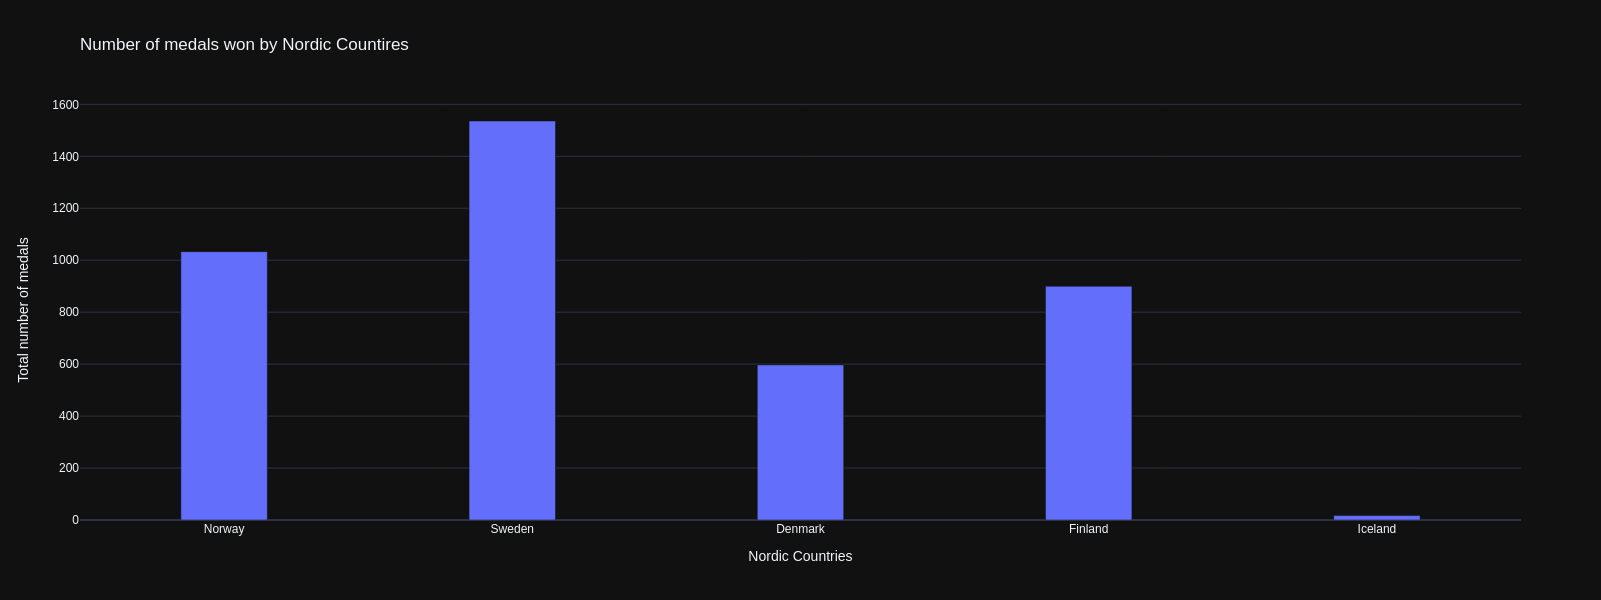

In [243]:
dic_country_vs_medals = {
    "Norway" : nor,
    "Sweden" : swe,
    "Denmark" : den,
    "Finland" : fin,
    "Iceland" : isl
}
keys = dic_country_vs_medals.keys()

def find_total_medals(key):
    return dic_country_vs_medals[key]["Medal"].shape[0] - dic_country_vs_medals[key]["Medal"].isnull().sum()


fig = px.bar(
    x=keys, 
    y=[find_total_medals(key) for key in keys], title="Number of medals won by Nordic Countires", 
    labels={"y": "Total number of medals", "x": "Nordic Countries"},
    height=600
)
fig.update_traces(width=0.3)
fig.layout.template = "plotly_dark"
fig.show()

The next task is to show one more attribute: Season. You should show the total number of medals per Nordic country, but separated by season. I.e, how many medals has Norway got in Summer Olympics, how many in Winter olympics; how many gold medals has Sweden got in Winter Olympics, how many in Summer, etc. Think about the "Season" attribute - what type does it have and what channel would be appropriate to visualize it?

**Task 3.2: Visualize total number of gold medals per Nordic country, per season.**

**TASK FOR YOU**:

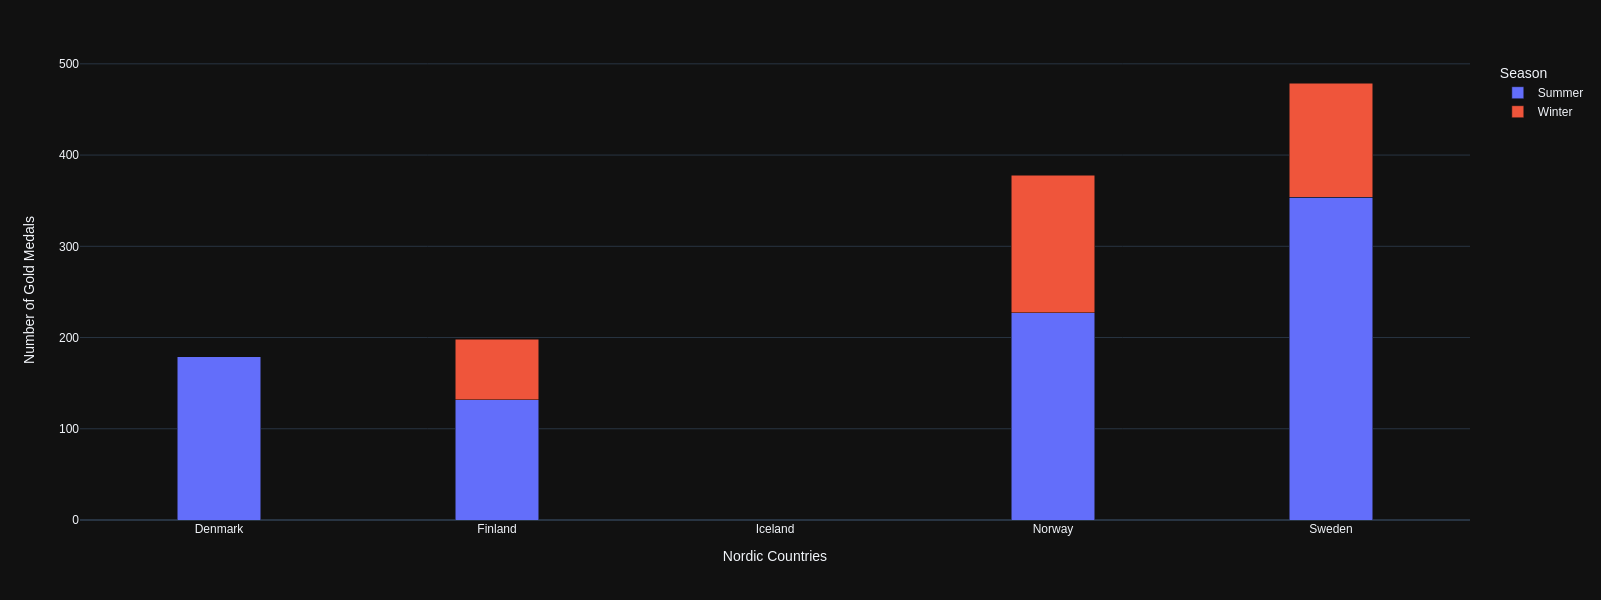

In [244]:
# Filtering out nordic countries that also won gold medals
gold_medals_per_season = olympics[olympics["NOC"].isin(["NOR", "SWE", "DEN", "FIN", "ISL"])]
gold_medals_per_season["Gold Medal"] = gold_medals_per_season["Medal"] == "Gold"
gold_medals_per_season = gold_medals_per_season.groupby(["NOC", "Season"], as_index=False).sum()
gold_medals_per_season["NOC"] = gold_medals_per_season["NOC"].replace(["NOR", "SWE", "DEN", "FIN", "ISL"], ["Norway", "Sweden", "Denmark", "Finland", "Iceland"])

fig = px.bar(gold_medals_per_season, x="NOC", y="Gold Medal",
             labels={
                 "Gold Medal" : "Number of Gold Medals",
                 "NOC": "Nordic Countries"
             },
             color='Season', barmode='stack',
             height=600)
fig.update_traces(width=0.3)
fig.layout.template = "plotly_dark"
fig.show()

**Task 3.3: Reflect/explain: why did you choose these chart types? What marks and channels are they using to convey the information of each attribute?**

**TASK FOR YOU**:

since we are required to show 2 quantative attributes, ie: Gold Medals won in Winter and Summer Olympics, and a categorical attribute, ie: Countries - With the requirements in mind, the **stacked bar chart** clearly makes more sense since we wish to:
- have a comparision between the number of medals won by the different Nordic countries.
- also be able to compare the total number of medals won by each countires using the same plot

**Note:** Sorting the bars are not needed since we are dealing with categorical data whose order has no relavance.

## Task 4: Visualize trend

Visualize number of women participating in the Olympics (with or without medals) over the years in a single chart. 

**TASK FOR YOU**:

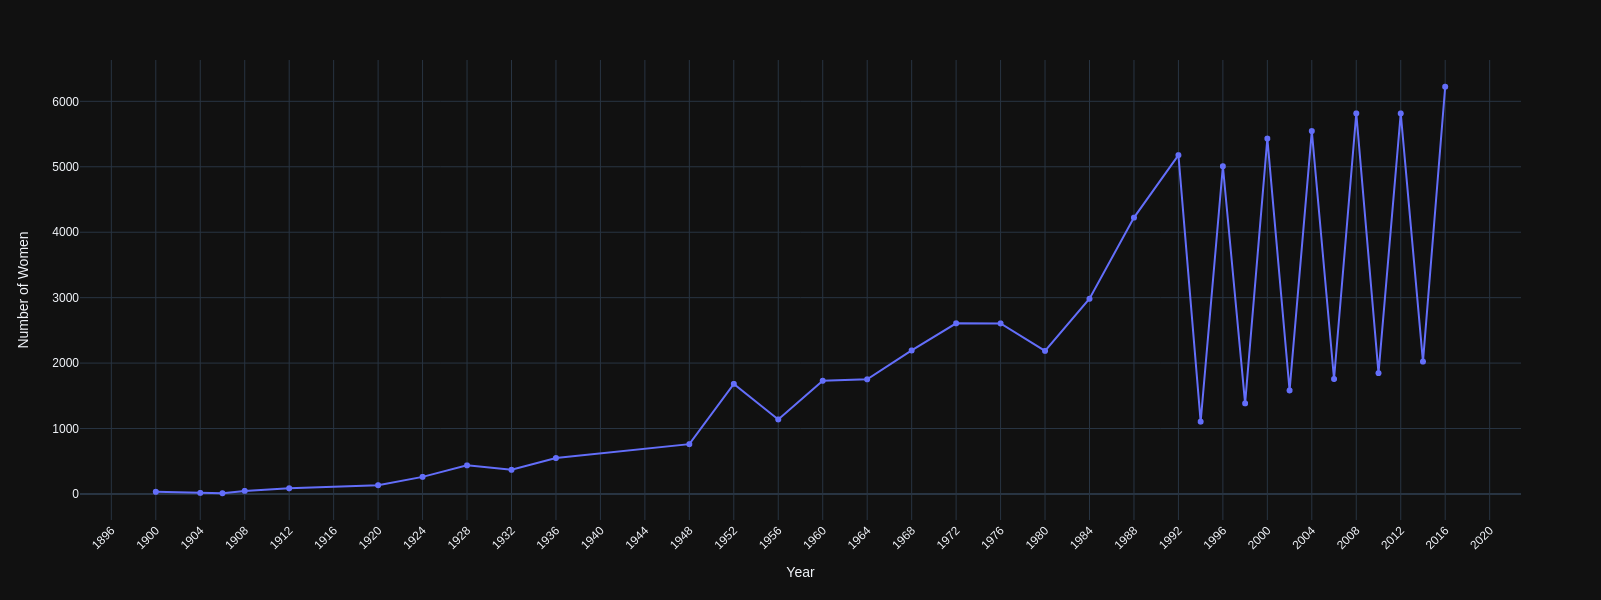

In [245]:
women_participation = olympics[olympics["Sex"] == "F"].groupby(by=["Year"], as_index=False).count()
fig = px.line(
    women_participation, 
    y="Sex", 
    x="Year", 
    labels={
        "Sex": "Number of Women"
    },
    height=600,
    markers=True
)
fig.layout.template = "plotly_dark"
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 4
    )
)
fig.update_xaxes(
    tickangle = -45,
)
fig.show()

**TASK FOR YOU: The chart probably will have som weird spikes towards the end. Do some analysis to understand what it means and why does it appear.**

The above line plot when plotted with dot marks shows a change in the frequency in which olympic has been conducted over the years. Notice that before 1992, the event was conducted roughly every 4 years, but after 1992, it seems like it has been conducted every 2 years. This is strange because olympics is actually conducted every 4 years. If we go to this [wiki](https://en.wikipedia.org/wiki/1992_Summer_Olympics) link, it says that 1992 was the last year in which Winter and Summer olympics were conducted in the same year. 
This explains why these spikes occur after 1992 and also why there are marks every 2 years instead of 4.
To confirm this, we can plot the same graph but split the data for winter and summer season. If our assumption hold, the graph should be smooth.

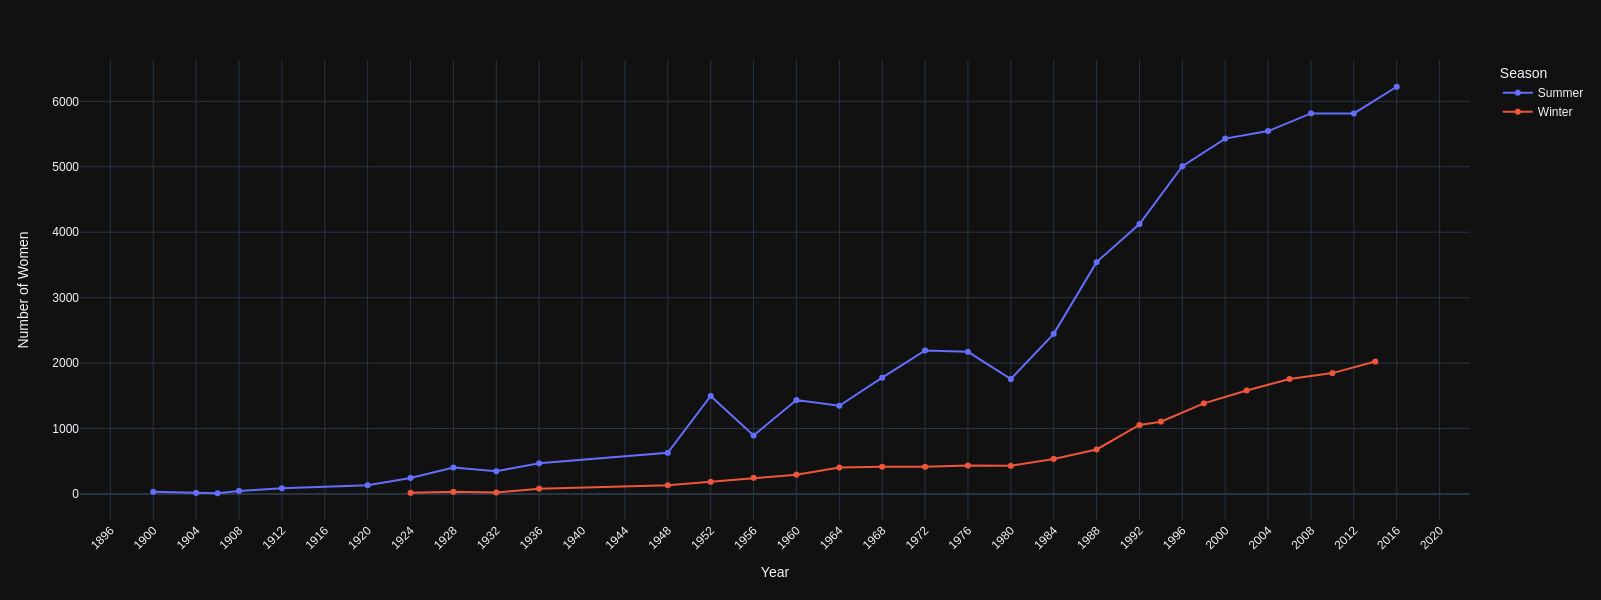

In [246]:
women_participation = olympics[olympics["Sex"] == "F"].groupby(by=["Year", "Season"], as_index=False).count()
fig = px.line(
    women_participation, 
    y="Sex", 
    x="Year", 
    labels={
        "Sex": "Number of Women"
    },
    height=600,
    color="Season",
    markers=True
)
fig.layout.template = "plotly_dark"
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        dtick = 4
    )
)
fig.update_xaxes(
    tickangle = -45,
)
fig.show()
# women_participation

**TASK FOR YOU: Find a reasonable way to aggregate the data to get the overall trend over the years. I.e., get rid of the spikes.**

In [247]:
# Your code here

**Your reflection here - Explain why your approach makes sense.**

## Task 5: Visualize statistics

Sometimes you want to look at distribution of values for an attribute. There are several choices. [Histogram](https://en.wikipedia.org/wiki/Histogram) is one of them. Idea of histogram: we split the value range into intervals of specific size and count how many attributes have value that fits within each interval. 

**Task 5.1: Show histogram of weight for all gold medal winners in the WINTER season.**

**TASK FOR YOU**:

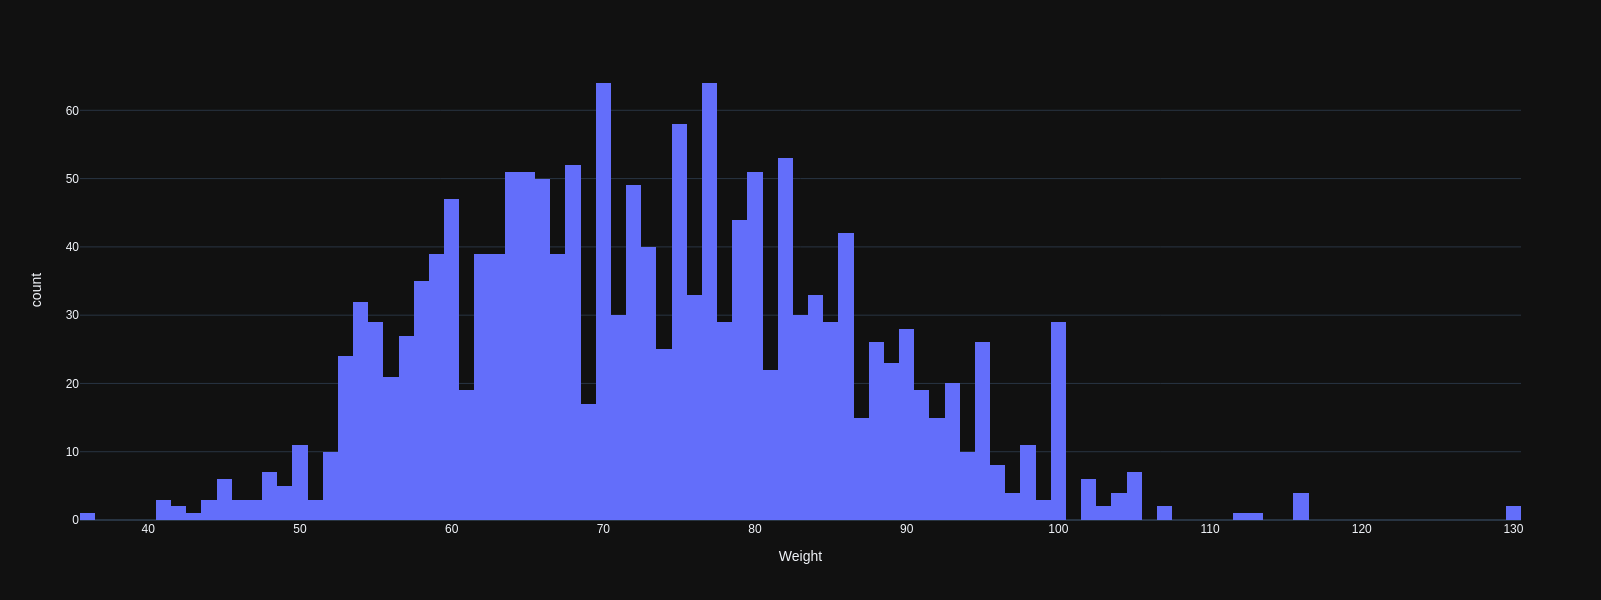

In [248]:
bin_width= 0.5 # To ensure that the two histograms are comparable

weight_data = olympics[(olympics["Season"] == "Winter") & (not olympics["Medal"].empty) & (olympics["Medal"] == "Gold")]

nbins = math.ceil((weight_data["Weight"].max() - weight_data["Weight"].min()) / bin_width)

fig = px.histogram(weight_data, x="Weight", height=600, nbins=nbins)
fig.layout.template = "plotly_dark"
fig.show()

**Task 5.2: Show histogram of weight for all gold medal winners in the SUMMER season.** Note: the histogram should be comparable with the WINTER histogram.

**TASK FOR YOU**:

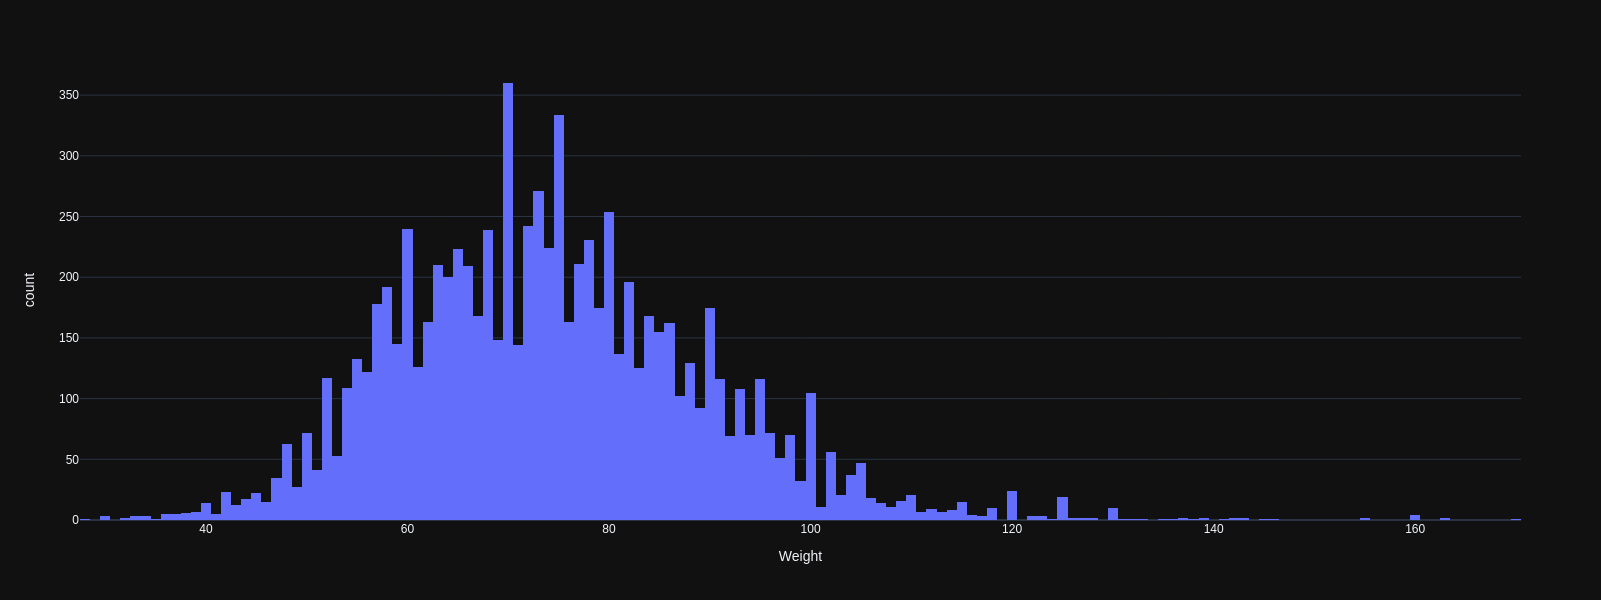

In [249]:
weight_data = olympics[(olympics["Season"] == "Summer") & (not olympics["Medal"].empty) & (olympics["Medal"] == "Gold")]

nbins = math.ceil((weight_data["Weight"].max() - weight_data["Weight"].min()) / bin_width)

fig = px.histogram(weight_data, x="Weight", height=600, nbins=nbins)
fig.layout.template = "plotly_dark"
fig.show()

## Task 6: Visualize trend of statistics (a bit more challenging)

In this task you will visualize how one attribute varies over time. But instead of visualizing a single value, we will look at the statistics.

First, we calculate Body Mass Index for all participants. Formula: BMI = Weight / (Height * Height)

In [250]:
olympics["BMI"] = olympics["Weight"] / (olympics["Height"] ** 2)

Your task is to group the entries by year, for each year show the statistics of BMI: the mean BMI value and the range of values. There are different options available, including:
- Show a box plot for each year
- Show [Bollinger Bands (R)"](https://en.wikipedia.org/wiki/Bollinger_Bands) for the BMI variable. Bollinger Bands is typically used in finance. But it uses statistical concepts in the core: a moving average line shown in the middle, upper and lower bands shown as the mean +/- two standard deviations.
- Be creative! :)

Note: the idea is to show this in a single plot. Don't create a separate box plot for every year.

Some inspirational examples from a [Kaggle solution by Marco Giuseppe de Pinto](https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games)):
<br/>
<img src="../doc/stats-plot-example.jpg" width="45%">
<img src="../doc/boxplots-example.jpg" width="45%">

**TASK FOR YOU**:

In [251]:
# Your code here

## Reflection

Please reflect on the following questions:
1. How did the assignment go? Was it easy or hard?
2. How many hours did you spend on it?
3. What was the most time-consuming part?
4. If you need to do similar things later in your professional life, how can you improve? How can you do it more efficiently?
5. Was tehre something you would expect to learn that this exercise did not include?
6. Was there something that does not make sense?